In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras

In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Thêm thư viện
from sklearn.metrics import classification_report
from keras.applications import VGG16
from sklearn.model_selection import train_test_split
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.applications import VGG16
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
import numpy as np
import random
import os
from keras.metrics import Precision, Recall, Accuracy

In [ ]:
# Load model VGG 16 của ImageNet dataset, include_top=False để bỏ phần Fully connected layer ở cuối.
baseModel = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3), classes=7)

# Xây thêm các layer
# Lấy output của ConvNet trong VGG16
fcHead = baseModel.output

# Flatten trước khi dùng FCs
fcHead = Flatten(name='flatten')(fcHead)

# Thêm FC
fcHead = Dense(256, activation='relu')(fcHead)
fcHead = Dropout(0.5)(fcHead)

# Output layer với softmax activation
fcHead = Dense(7, activation='softmax')(fcHead)

# Xây dựng model bằng việc nối ConvNet của VGG16 và fcHead
model = Model(inputs=baseModel.input, outputs=fcHead)

In [ ]:
model.load_weights("/content/drive/MyDrive/Project/Model/finetuning-BalancedData-best_weight.weights.h5")

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.input_shape

(None, 224, 224, 3)

In [ ]:
from PIL import Image
def load_resized_image(image_path):
        image = Image.open(image_path)
        resized_image = image.resize((224, 224))
        return np.asarray(resized_image)

In [ ]:
img = load_resized_image("/content/drive/MyDrive/Project/Dataset/ISIC_0034105.jpg")

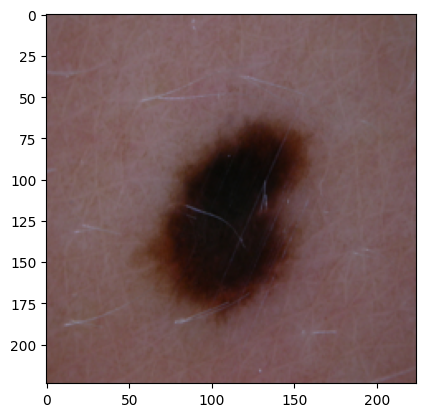

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(224, 224, 3)

In [ ]:
X = img[np.newaxis, :, :, :]
print(X.shape)
X = X / 255

(1, 224, 224, 3)


In [ ]:
predictions = model.predict(X)
print(predictions)

1/1 [==============================] - 1s 709ms/step
[[0.03563584 0.05687648 0.11828274 0.0409565  0.20811291 0.37487876
  0.1652568 ]]


In [ ]:
predictions = np.argmax(predictions, axis=1)
predicted_class = predictions[0]

In [ ]:
predicted_class

5

In [ ]:
type_of_Lesion = ['Actinic keratoses','Basal cell carcinoma','Benign keratosis-like lesions','Dermatofibroma','Melanocytic nevi','Melanoma','Vascular lesions']

In [ ]:
print(type_of_Lesion[predicted_class])

Melanoma


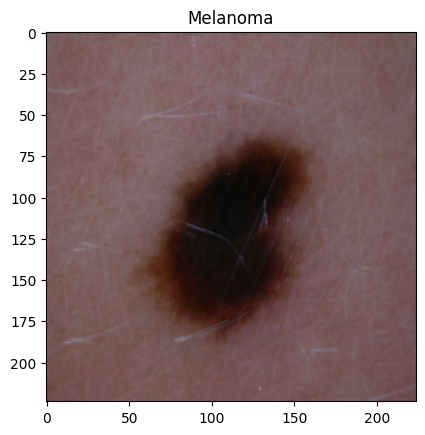

In [ ]:
import matplotlib.pyplot as plt
plt.title(type_of_Lesion[predicted_class])
plt.imshow(img)